## Machine Learning

Kaggle's 30 days of Machine Learning  
*AI Pilipinas*

*Prepared by:*
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

This notebook shows how perform basic machine learning in Python using sklearn.

## Preliminaries

### Import libraries

These 3 libraries are sometimes called the data science library trio or trifecta since almost all data analysis projects in Python use these.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The following cell is for modifying the aesthetics of the graphs.

In [2]:
import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
# sns.color_palette('Set2')

### Load Dataset

We'll be using the **Iris dataset** for this exercise. The dataset contains 3 classes:
 - 0 - Iris-Setosa
 - 1 - Iris-Versicolour
 - 2 - Iris-Virginica

We will also be splitting the dataset into train and test sets.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)

## Exploratory Data Analysis

It is a good practice to explore our data first before we do modeling.

### Descriptive Statistics

In [4]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualize the data

Typically, in the EDA step, we visualize the data that we have to understand it better.

In [5]:
merged_X_y = np.concatenate((X, y.reshape(-1, 1)), axis=1)
df = pd.DataFrame(merged_X_y, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df['target'] = df['target'].astype(int)

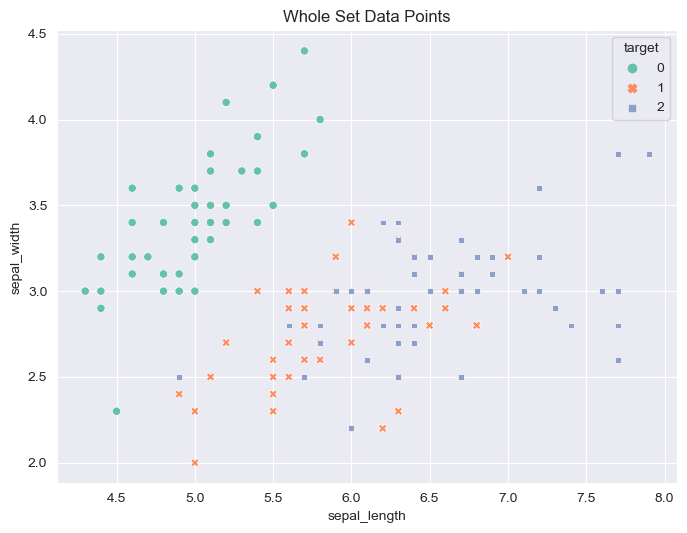

In [6]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")

plt.title('Whole Set Data Points')
plt.show()

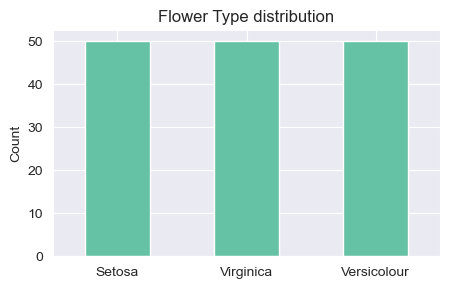

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=100)
df['target'].value_counts().plot(kind='bar')
plt.xticks(ticks=range(3), labels=['Setosa', 'Virginica', 'Versicolour'], rotation=0)
plt.ylabel('Count')
plt.title('Flower Type distribution')
plt.show()

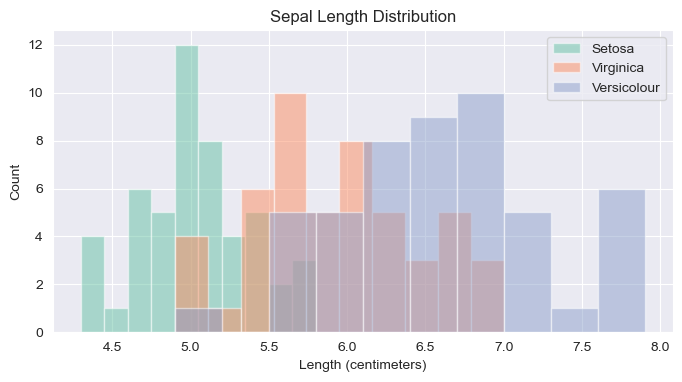

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
df[df['target']==0].iloc[:,0].hist(alpha=0.5, label='Setosa')
df[df['target']==1].iloc[:,0].hist(alpha=0.5, label='Virginica')
df[df['target']==2].iloc[:,0].hist(alpha=0.5, label='Versicolour')
plt.title('Sepal Length Distribution')
plt.ylabel('Count')
plt.xlabel('Length (centimeters)')
plt.legend()
plt.show()

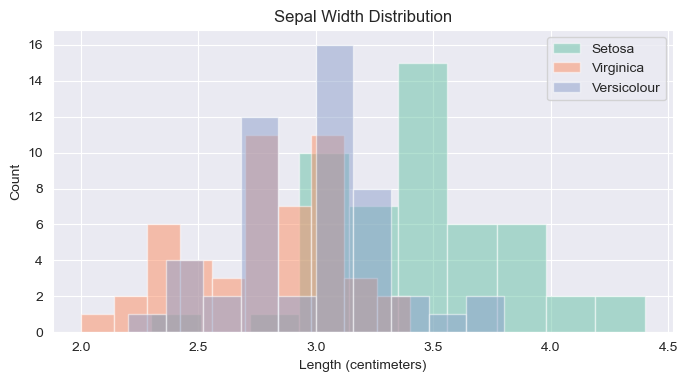

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
df[df['target']==0].iloc[:,1].hist(alpha=0.5, label='Setosa')
df[df['target']==1].iloc[:,1].hist(alpha=0.5, label='Virginica')
df[df['target']==2].iloc[:,1].hist(alpha=0.5, label='Versicolour')
plt.title('Sepal Width Distribution')
plt.ylabel('Count')
plt.xlabel('Length (centimeters)')
plt.legend()
plt.show()

## Modeling using sklearn

**What is sklearn?**
> "Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities." 

For more details, please refer to <a href="https://scikit-learn.org/stable/getting_started.html">sklearn website</a>.

sklearn has classification and regression implementations for many machine learning models. We'll be using them in the following examples. 

In practice, we often use the `sklearn` library to do machine learning. We can do train and evaluate an ML model with the following lines of code:

### **TL;DR Code**

```python
model = ... # use appropriate model and set necessary hyperparameters.
model.fit(X_train, y_train) # train the model using train set.
model.score(X_test, y_test) # predict the test set and evaluate the results.
```

This is applicable to almost all (if not all) ML algorithms in sklearn. Note that this is the simplest case and a naive way of doing things. This could work if you have a very easy problem/dataset. Normally, you will be doing other things such as preprocessing, normalization, feature engineering, and hyperparameter optimization in between.

## Preprocessing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)


In [11]:
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
# df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
# df_test = pd.DataFrame(test_set, columns=columns)
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.6,3.6,1.0,0.2,0
1,5.7,4.4,1.5,0.4,0
2,6.7,3.1,4.4,1.4,1
3,4.8,3.4,1.6,0.2,0
4,4.4,3.2,1.3,0.2,0


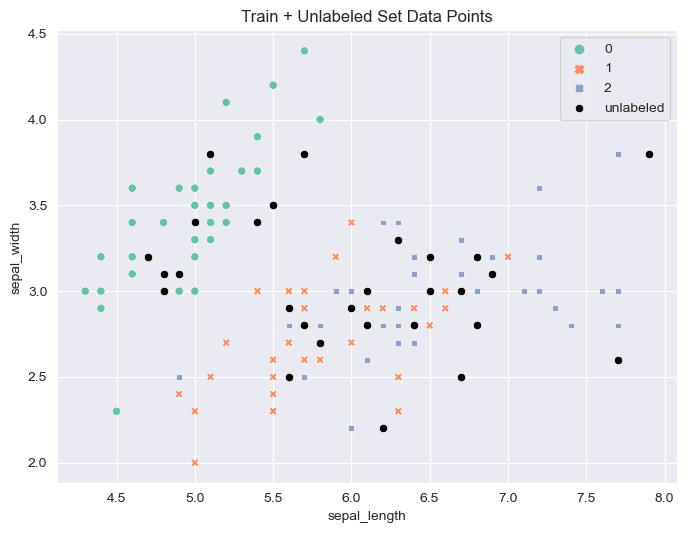

In [12]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled')

plt.title('Train + Unlabeled Set Data Points')
plt.show()

## Classification

Let's do classification using sklearn

### Model Training

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
clf = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=-1) # instantiate model
clf.fit(X_train, y_train) # train the model

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

### Prediction

In [15]:
y_pred = clf.predict(X_test) # predict the corresponding labels given the trained model and input matrix
y_pred[:5]

array([1, 0, 2, 1, 1])

### Evaluation

By default, this uses the accuracy metric.

In [16]:
score = clf.score(X_test, y_test) # predicts and evaluates in one line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 100.00%


Since this is an easy dataset, we were able to get very high accuracies for both train and test set.

Let's also compute for other classification metrics.

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualize our predictions

In [18]:
y_pred = clf.predict(X_test)

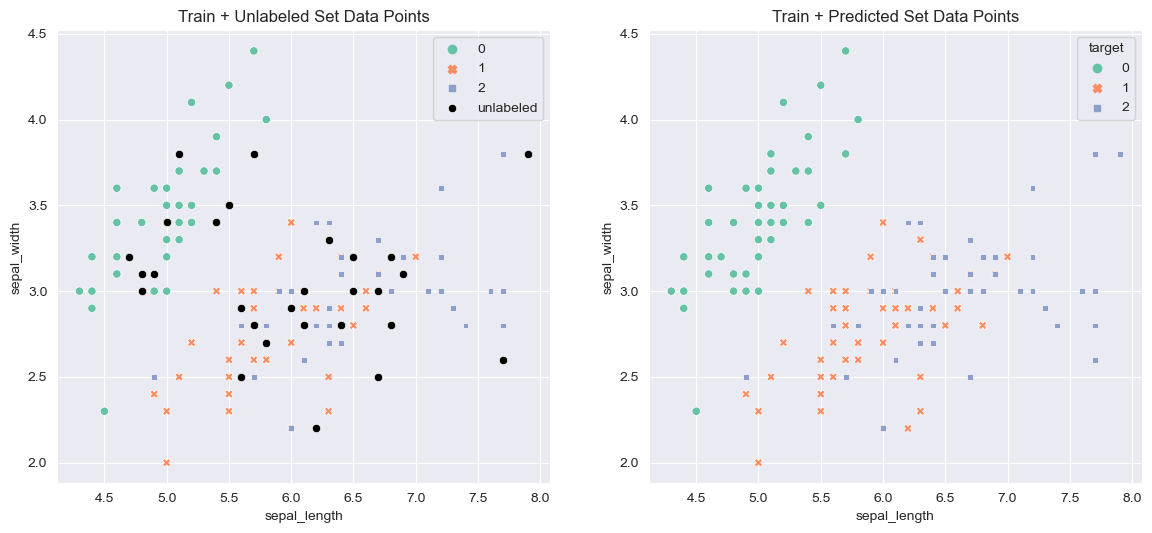

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), dpi=100)

pred_set = np.concatenate((X_test, np.array(y_pred).reshape(-1,1)), axis=1)
df_pred = pd.DataFrame(pred_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_pred['target'] = df_pred['target'].astype(int)

df_pred = pd.concat([df_train, df_pred])

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2", ax=ax1)
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled', palette="Set2", ax=ax1)
sns.scatterplot(data=df_pred, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2", ax=ax2)

ax1.set_title('Train + Unlabeled Set Data Points')
ax2.set_title('Train + Predicted Set Data Points')
plt.show()

## Spam Classifier

Let's try to identify which emails are spam based on the content.

In [20]:
df_spam = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/spam_ham_dataset.csv')
df_spam = df_spam[['label', 'text']]
df_spam.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...


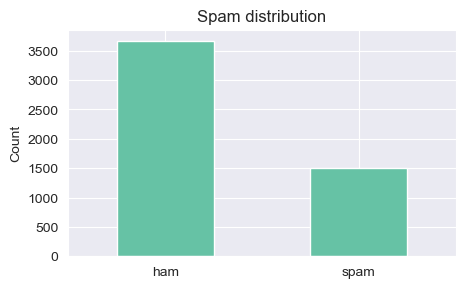

In [21]:
fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=100)
df_spam['label'].value_counts().plot(kind='bar')
plt.title('Spam distribution')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

### Preprocessing

We will preprocess our text data first so that it can be understood by our ML model.

In [22]:
X = df_spam['text']
y = df_spam['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (5171,), Output: (5171,)
Train Set Size | Input: (4136,), Output: (4136,)
Test Set Size | Input: (1035,), Output: (1035,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = X_train
vec = CountVectorizer(stop_words='english', min_df=10)
X_train_transformed = vec.fit_transform(X_train).todense()
X_test_transformed = vec.transform(X_test).todense()

In [24]:
X_train_transformed.shape, X_test_transformed.shape

((4136, 3955), (1035, 3955))

### Modeling

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_transformed, y_train)
score = clf.score(X_train_transformed, y_train) # predicts and evaluates in one line
print(f"Train Set Score: {score:.2%}")

Train Set Score: 99.76%


In [26]:
score = clf.score(X_test_transformed, y_test) # predicts and evaluates in one line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 97.68%


### Not Spam (Ham) examples

In [27]:
hams = y_test[y_test=='ham'].iloc[:5]
hams

1566    ham
1235    ham
2868    ham
4903    ham
1471    ham
Name: label, dtype: object

In [28]:
sample = X_test[hams.index]
sample

1566    Subject: hpl nom for march 30 , 2001\n( see at...
1235    Subject: re : nom / actual volume for april 17...
2868    Subject: re : meter 8740 dec 99\nrobert and i ...
4903    Subject: re : coastal oil & gas corporation\nm...
1471    Subject: enron / hpl actuals for july 27 , 200...
Name: text, dtype: object

In [29]:
clf.predict(vec.transform(sample))

array(['ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

### Spam examples

In [30]:
spams = y_test[y_test=='spam'].iloc[:5]
spams

1988    spam
1662    spam
3820    spam
3732    spam
4692    spam
Name: label, dtype: object

In [31]:
sample = X_test[spams.index]
sample

1988    Subject: online pharxmacy 80 % off all meds\nd...
1662    Subject: wow , , , , cash out @ 4 . 19 %\nwher...
3820    Subject: awesome movies of the super sexy jaim...
3732    Subject: ad - when he said he could make me fa...
4692    Subject: upgrade your os to xp pro for $ 50\nw...
Name: text, dtype: object

In [32]:
clf.predict(vec.transform(sample))

array(['spam', 'spam', 'spam', 'spam', 'spam'], dtype=object)

## Regression

Regression is very similar to classification in sklearn.

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **Boston dataset**. It contains the house pricing data in Boston as well as the following features:

 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per \$10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000’s

For more info, please see <a href="https://scikit-learn.org/stable/datasets/index.html#boston-dataset">this link</a>.

And, as usual, we will also be splitting the dataset into train and test sets.

In [33]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


### Model Training

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
reg = KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1) # instantiate model
reg.fit(X_train, y_train) # train the model

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

### Prediction

In [36]:
y_pred = reg.predict(X_test) # predict the corresponding labels given the trained model and input matrix
y_pred[:5]

array([25.1       , 32.76666667, 14.6       , 31.        , 17.13333333])

### Evaluation

By default, sklearn uses R-squared when evaluating regression tasks.

In [37]:
score = reg.score(X_test, y_test) # predicts and evaluates in one line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 70.46%


## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>